# Normal Distribution

A continuous random variable $X$ is said to have a normal distribution (or Gaussian distribution) with parameters $\mu$ and $\sigma$, where $-\infty \leq \mu \leq \infty$ and $\sigma > 0$, if the pdf of $X$ is 

$$
    f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} \text{, where } -\infty \leq x \leq \infty
$$

The statement that $X$ is normally distributed with parameters $\mu$ and $\sigma$ is often abbreviated as $X \sim \mathcal{N}(\mu,\sigma)$. We will perform an exercise as we did with uniform distribution.

**Example**: Suppose the force acting on a column that helps to support a building is a normally distributed random variable $X$ with mean value 9 N and standard deviation 1.5 N.

Now, let's use `norm` object within `scipy.stats` module to answer various questions related to this example. Reading the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) for normal distribution implemented in scipy will help.

Following block imports all the required packages:

In [1]:
from scipy.stats import norm # Imports normal distribution
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Question**: Compute mean, variance, and standard deviation.

**Answer**: This is very straight-forward since it is gaussian distribution, but just to demostrate, we will use `norm` object.

In [3]:
loc = 9 # mean
scale = 1.5 # std dev

# Creating normal distribution object with fixed mean and variance
rv = norm(loc=loc, scale=scale)

# Compute mean of the distribution
print("Mean for this distribution: {}".format(rv.mean()))

# Compute variance of the distribution
print("Variance for this distribution: {}".format(rv.var()))

# Compute std-dev of the distribution
print("Standard deviation for this distribution: {}".format(rv.std()))

Mean for this distribution: 9.0
Variance for this distribution: 2.25
Standard deviation for this distribution: 1.5


**Question**: Compute $P(X \leq 8.8)$

**Answer**: $P(X \leq 8.8) = F(8.8)$. So, we need to compute cdf of normal distribution at 8.8. Following block of code shows how to do that:

In [4]:
# P(X <= 8.8)
rv.cdf(8.8)

0.4469648833763862

**Question**: Compute $P(X \leq 11)$

**Answer**: $P(X \leq 11) = F(11)$. So, we need to compute cdf of normal distribution at 11. Following block of code shows how to do that:

In [5]:
# P(X <= 11)
rv.cdf(11)

0.9087887802741321

**Question**: Compute $P(X \geq 7.5)$

**Answer**: $P(X \geq 7.5) = P(X > 7.5) = 1 - P(X \leq 7.5) = 1 - F(7.5)$. So, we need to compute cdf of normal distribution at 7.5. Following block of code shows how to do that:

In [6]:
# P(X >= 7.5)
1 - rv.cdf(7.5)

0.8413447460685429

**Question**: Compute $P(9 \leq X \leq 10)$

**Answer**: $P(9 \leq X \leq 10) = F(10) - F(9)$. So, we need to compute cdf of normal distribution at 9 and 10. Following block of code shows how to do that:

In [8]:
# P(9 <= X <= 10)
rv.cdf(10) - rv.cdf(9)

0.2475074624530771

**Question**: Plot the pdf and cdf for this example.

**Answer**: We can use the `rv` variable created in previous block and compute value of pdf and cdf at a bunch of x values. Then, use `matplotlib` to plot them. Code in the following block executes this task.

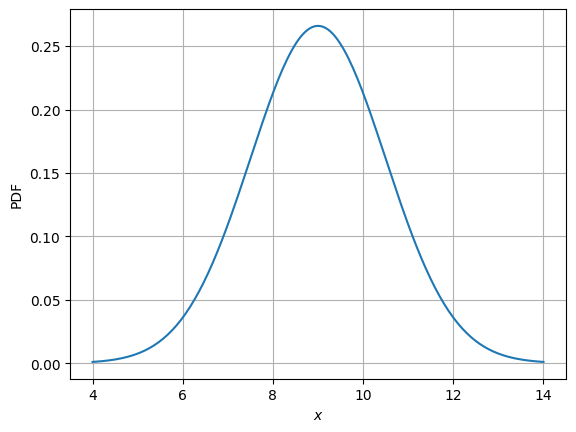

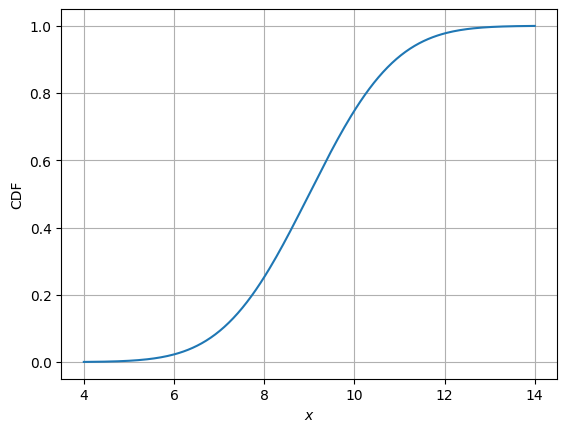

In [9]:
# Creating array of x values at which pdf and cdf will be computed while plotting
x = np.linspace(4, 14, 200)

# Plotting PDF
fig, ax = plt.subplots()
ax.plot(x, rv.pdf(x))
ax.set_xlabel("$x$")
ax.set_ylabel("PDF")
ax.grid()
plt.show()

# Plotting CDF
fig, ax = plt.subplots()
ax.plot(x, rv.cdf(x))
ax.set_xlabel("$x$")
ax.set_ylabel("CDF")
ax.grid()
plt.show()

Similar to last case, we will look into frequency interpretation of probability. Below code plots the distribution of  randomly drawn samples as you increase the number of samples. Since the number of samples will be high, it might take some time to generate the plots.

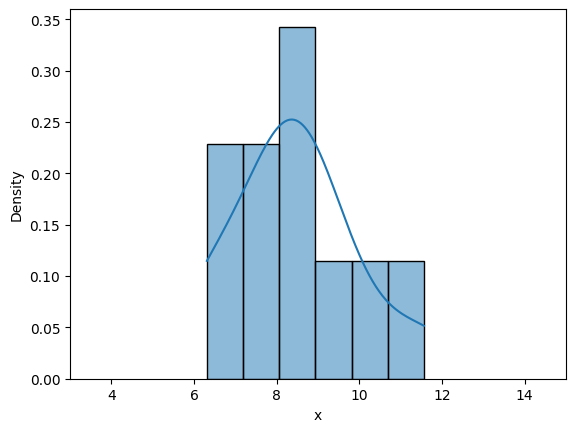

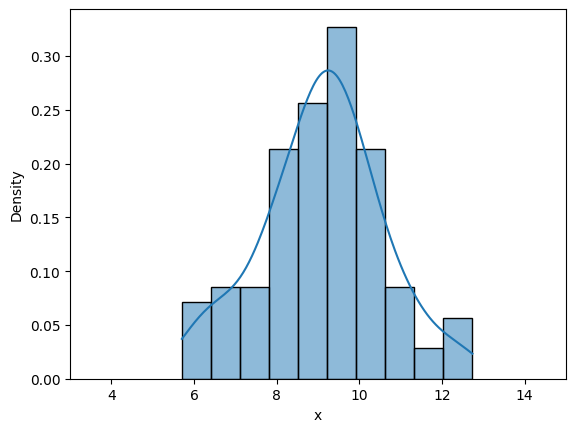

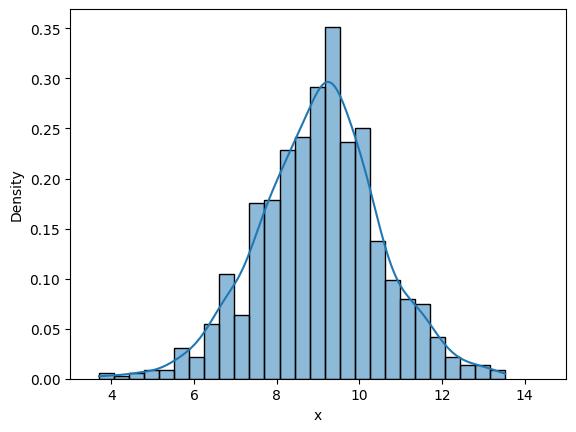

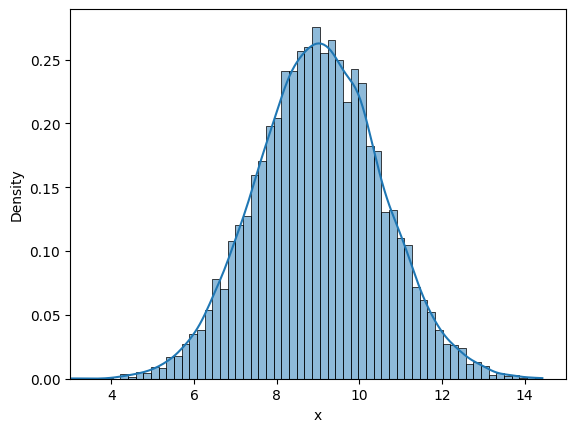

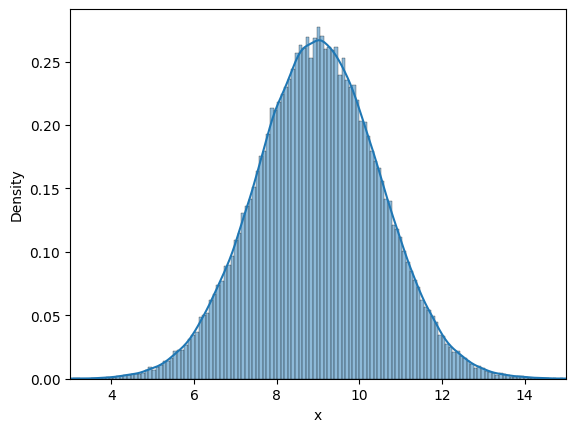

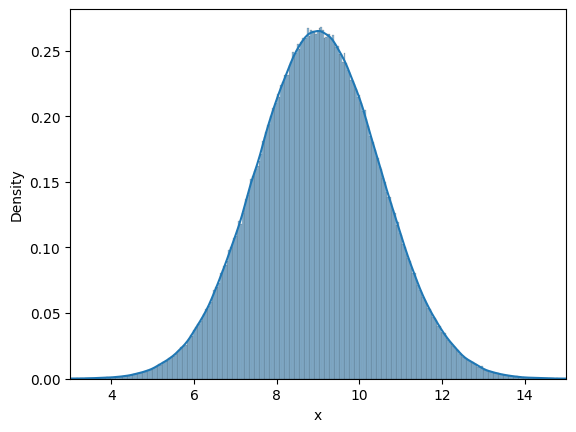

In [10]:
# Some parameters
initial_samples = 10
iter = 6

for i in range(iter):
    # Number of samples
    samples = initial_samples*10**(i)

    # Generate samples from the distribution
    data = rv.rvs(size=samples)

    # Plotting using seaborn
    fig, ax = plt.subplots()
    plot = sns.histplot(data, stat="density", ax=ax, kde=True)
    ax.set_xlabel("x")
    ax.set_xlim([3, 15])

Similar to previous case, as the number of samples increase, the density curve approaches theortical normal density curve. You can play around with the value of iter, initial_samples, and see how distribution changes.